# Train model with different tools

## load data

In [20]:
import pandas
import numpy as np
import matplotlib.pyplot as plt
import json

In [2]:
hd_ttH=pandas.read_hdf('../../Files/skimmed/ttH.h5', 'df')
hd_ttW=pandas.read_hdf('../../Files/skimmed/ttW.h5', 'df')

In [3]:
hd_ttH.head()
#hd_ttH['DRll01']

,DEtall01,lep_flavour,max_eta,minDeltaR_LJ_0,minDeltaR_LJ_1,Meff,DRlj00,min_DRl0b,min_DRlj_new,DPhij0MET,...,DRll01,nJets_OR_T,nJets_OR_T_MV2c10_70,HT_lep,HT_jets,lead_jetPt,sublead_jetPt,lepSFTrigTight,lepSFObjTight,weightS
entry,,,,,,,,,,,,,,,,,,,,,
0,1.155438,0,1.329590,0.889894,0.928825,1.219812e+06,3.609838,1.568172,1.204130,1.778188,...,2.833694,6,2,99685.375000,495748.250000,128011.968750,98597.164062,0.995519,0.943437,0.001535
1,-0.880768,1,0.463217,0.414457,0.788038,5.954846e+05,0.414457,2.340907,0.619072,2.925315,...,2.171907,5,1,73758.687500,225793.921875,68017.406250,42586.082031,0.636021,1.003987,0.001450
2,0.212666,1,0.168891,1.067585,1.043223,7.060143e+05,3.105180,1.730127,0.658229,1.766358,...,2.189412,4,1,110116.250000,236623.578125,126511.656250,47005.578125,0.960368,0.941945,0.001524
3,0.332677,2,1.323761,0.642110,0.488249,8.401949e+05,2.741835,2.741835,1.360282,2.360640,...,2.389086,5,1,56536.421875,353416.281250,138765.578125,85941.804688,0.989835,0.946505,0.001931
4,0.219985,3,1.913489,1.176604,1.057895,1.365021e+06,1.656937,1.927142,1.771835,1.254011,...,0.472404,7,1,83682.382812,543441.937500,176302.593750,157836.390625,0.993249,0.965123,0.001253


Select branches used in default MVA training of the analysis (rought, to be optimized!)

In [21]:
with open("../VarList_def.json") as vardict:
    variablelist = json.load(vardict)[:]

In [22]:
variablelist

['max_eta',
 'lep_Pt_1',
 'Mll01',
 'minDeltaR_LJ_0',
 'minDeltaR_LJ_1',
 'MET_RefFinal_et',
 'nJets_OR_T',
 'nJets_OR_T_MV2c10_70',
 'lep_flavour']

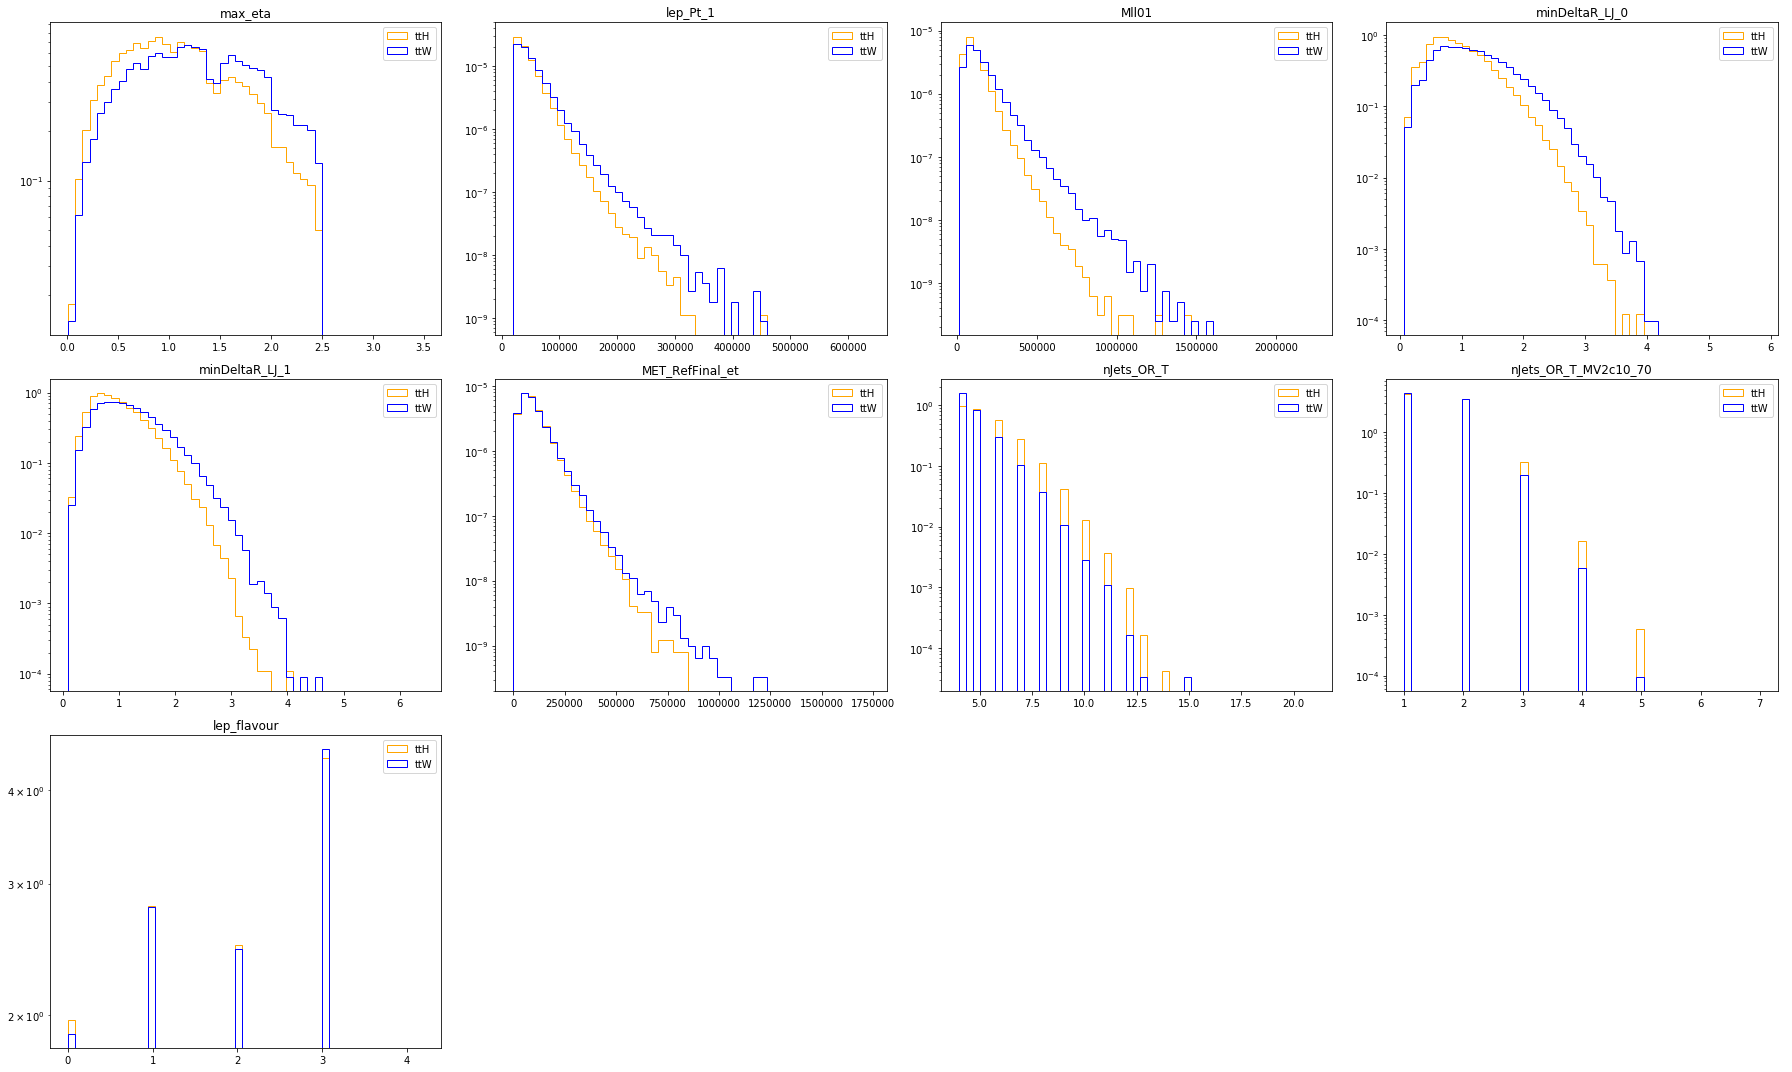

In [26]:
fig, ax = plt.subplots(3, 4, figsize=(25, 15))
nbins = 50

varcounter = -1
for i, axobjlist in enumerate(ax):
      for j, axobj in enumerate(axobjlist):
        varcounter+=1
        if varcounter < len(variablelist):
            var = variablelist[varcounter]
        
            p_ttH = pandas.DataFrame({var: hd_ttH[var]})
            p_ttW = pandas.DataFrame({var: hd_ttW[var]})
            #b.replace([np.inf, -np.inf], np.nan, inplace=True)
            #c.replace([np.inf, -np.inf], np.nan, inplace=True)
            #b = b.dropna()
            #c = c.dropna()            
            minval = np.amin(p_ttH[var])
            maxval = max([np.amax(p_ttH[var]), np.amax(p_ttW[var])])*1.4
            binning = np.linspace(minval,maxval,nbins)

            axobj.hist(p_ttH[var],binning,histtype=u'step', color='orange',label='ttH',density=1)
            axobj.hist(p_ttW[var],binning,histtype=u'step', color='b',label='ttW',density=1)
            axobj.legend()
            axobj.set_yscale('log',nonposy='clip')
            axobj.set_title(variablelist[varcounter])

        else:
            axobj.axis('off')

plt.tight_layout()
plt.savefig("Plots/train-variables.png", transparent=True)
plt.show()

Make dataframe with only selected variables:

In [31]:
ttH_vars=hd_ttH[variablelist]
ttH_vars.head()

,max_eta,lep_Pt_1,Mll01,minDeltaR_LJ_0,minDeltaR_LJ_1,MET_RefFinal_et,nJets_OR_T,nJets_OR_T_MV2c10_70,lep_flavour
entry,,,,,,,,,
0,1.329590,34500.503906,108046.875000,0.889894,0.928825,39020.136719,6,2,0
1,0.463217,33267.367188,69952.875000,0.414457,0.788038,42094.937500,5,1,1
2,0.168891,30102.220703,87631.835938,1.067585,1.043223,38622.136719,4,1,1
3,1.323761,21472.625000,51622.734375,0.642110,0.488249,71650.296875,5,1,2
4,1.913489,37818.144531,19572.355469,1.176604,1.057895,18787.943359,7,1,3


In [32]:
ttW_vars=hd_ttW[variablelist]
ttW_vars.head()

,max_eta,lep_Pt_1,Mll01,minDeltaR_LJ_0,minDeltaR_LJ_1,MET_RefFinal_et,nJets_OR_T,nJets_OR_T_MV2c10_70,lep_flavour
entry,,,,,,,,,
0,1.729638,49419.792969,91524.117188,1.172905,1.475200,41394.917969,5,1,1
1,1.749197,45077.339844,142875.562500,0.829797,0.600210,76001.085938,5,2,3
2,1.169918,42183.855469,104695.812500,1.568774,1.940837,29016.025391,4,2,3
3,0.988171,140012.703125,391173.062500,3.032293,0.802621,374422.937500,4,2,1
4,2.325052,35206.718750,94523.875000,0.829457,1.055333,74552.109375,5,1,3


 * X = signal + background data;
 * object y - hold the class labels.

The correspondence between `X` and `y` is given by the index

In [33]:
X = np.concatenate((ttH_vars,ttW_vars)) # training data                                                                                                                               
y = np.concatenate((np.ones(ttH_vars.shape[0]),np.zeros(ttW_vars.shape[0]))) # class lables                                                                                           


In [34]:
X[:1]

array([[1.32959020e+00, 3.45005039e+04, 1.08046875e+05, 8.89893949e-01,
        9.28824604e-01, 3.90201367e+04, 6.00000000e+00, 2.00000000e+00,
        0.00000000e+00]])

In [35]:
y[:1]

array([1.])

## Check models

For reference, performance of TMVA BDT with varlist used above:

AUROC "BDT" =  0.7265699853415943 

In [40]:
tmva_bdt_ROC=0.726569

## scikit-learn

In [36]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

Split sample to training and test in fraction: 2/3 train, 1/3 test

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

define BDT model

In [38]:
bdt = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=4, max_features='auto', min_samples_split=10, min_samples_leaf=10), n_estimators=100, learning_rate=1)

train model

In [39]:
bdt.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=10,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1, n_estimators=100, random_state=None)

get scores from test sample      

In [41]:
y_predicted = bdt.predict(X_test)

classification performance      

In [42]:
print( classification_report(y_test, y_predicted, target_names=["signal", "background"]))
print( "Area under ROC curve: %.4f"%(roc_auc_score(y_test, bdt.decision_function(X_test))))
print( "wrt TMVA BDT: %.4f"%(roc_auc_score(y_test, bdt.decision_function(X_test))/tmva_bdt_ROC))

              precision    recall  f1-score   support

      signal       0.68      0.73      0.70     28600
  background       0.63      0.57      0.60     23097

   micro avg       0.66      0.66      0.66     51697
   macro avg       0.66      0.65      0.65     51697
weighted avg       0.66      0.66      0.66     51697

Area under ROC curve: 0.7152
wrt TMVA BDT: 0.9844


-> ~same performance - as expected (TMVA uses weights, to be introduced here)